<a href="https://colab.research.google.com/github/Trace-dap-troai/week1/blob/main/Week_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================
# 0. Setup & Load Dataset
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

# Create folder for plots
os.makedirs("plots", exist_ok=True)

# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [ ]:
# =========================
# 1. Descriptive Statistics
# =========================
grouped = df.groupby("species")["sepal length (cm)"]

desc_stats = pd.DataFrame({
    "mean": grouped.mean(),
    "median": grouped.median(),
    "std": grouped.std()
})

print("\n1. Descriptive statistics (Sepal length):")
print(desc_stats)

highest_variability = desc_stats["std"].idxmax()
print("\nSpecies with highest variability:", highest_variability)

print("\nInterpretation:")
print(f"{highest_variability} has the highest standard deviation, meaning its sepal length values are the most spread out.")



1. Descriptive statistics (Sepal length):
             mean  median       std
species                            
setosa      5.006     5.0  0.352490
versicolor  5.936     5.9  0.516171
virginica   6.588     6.5  0.635880

Species with highest variability: virginica

Interpretation:
virginica has the highest standard deviation, meaning its sepal length values are the most spread out.


In [ ]:
# =================================
# 2. Central Tendency & Dispersion
# =================================
grouped_petal = df.groupby("species")["petal length (cm)"]

petal_stats = pd.DataFrame({
    "mean": grouped_petal.mean(),
    "median": grouped_petal.median(),
    "mode": grouped_petal.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    "variance": grouped_petal.var(),
    "std": grouped_petal.std()
})

print("\n2. Petal length statistics:")
print(petal_stats)

print("\nExplanation:")
print("The median differs from the mean when the data is skewed or contains outliers, because the mean is sensitive to extreme values while the median is not.")



2. Petal length statistics:
             mean  median  mode  variance       std
species                                            
setosa      1.462    1.50   1.4  0.030159  0.173664
versicolor  4.260    4.35   4.5  0.220816  0.469911
virginica   5.552    5.55   5.1  0.304588  0.551895

Explanation:
The median differs from the mean when the data is skewed or contains outliers, because the mean is sensitive to extreme values while the median is not.


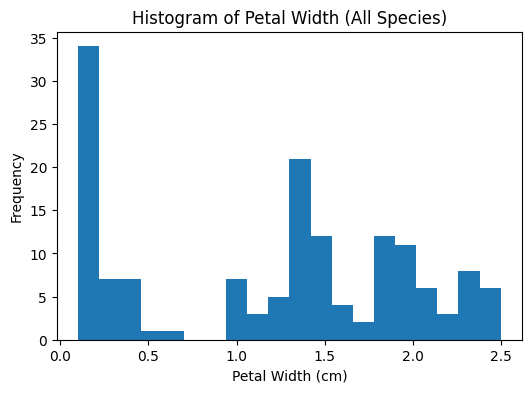

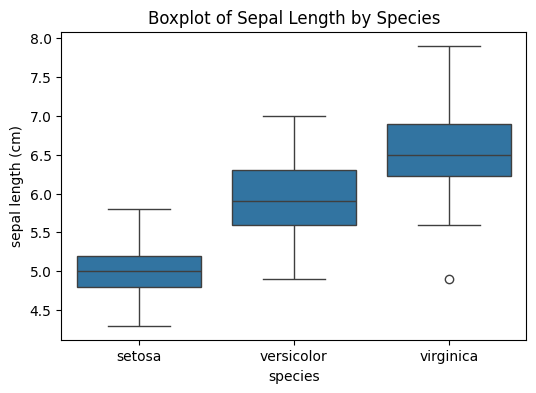


Answer:
The boxplot better shows between-species differences because it directly compares the distributions of each species.


In [ ]:
# =================
# 3. Visualization
# =================

# Histogram of petal width
plt.figure(figsize=(6,4))
plt.hist(df["petal width (cm)"], bins=20)
plt.title("Histogram of Petal Width (All Species)")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.savefig("plots/histogram_petal_width.png")
plt.show()

# Boxplot of sepal length by species
plt.figure(figsize=(6,4))
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.title("Boxplot of Sepal Length by Species")
plt.savefig("plots/boxplot_sepal_length.png")
plt.show()

print("\nAnswer:")
print("The boxplot better shows between-species differences because it directly compares the distributions of each species.")


In [ ]:
# =========================
# 4. Skewness
# =========================
skewness = df.groupby("species")["petal length (cm)"].apply(stats.skew)

print("\n4. Skewness of petal length:")
print(skewness)

most_positive = skewness.idxmax()
most_negative = skewness.idxmin()

print("\nMost positively skewed:", most_positive)
print("Most negatively skewed:", most_negative)

print("\nInterpretation:")
print("Positive skew means the distribution has a longer right tail, negative skew means a longer left tail.")



4. Skewness of petal length:
species
setosa        0.103175
versicolor   -0.588159
virginica     0.532822
Name: petal length (cm), dtype: float64

Most positively skewed: virginica
Most negatively skewed: versicolor

Interpretation:
Positive skew means the distribution has a longer right tail, negative skew means a longer left tail.


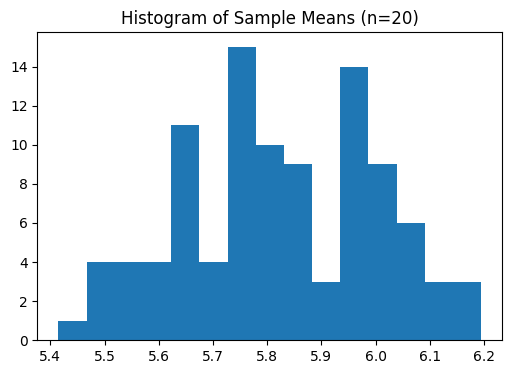

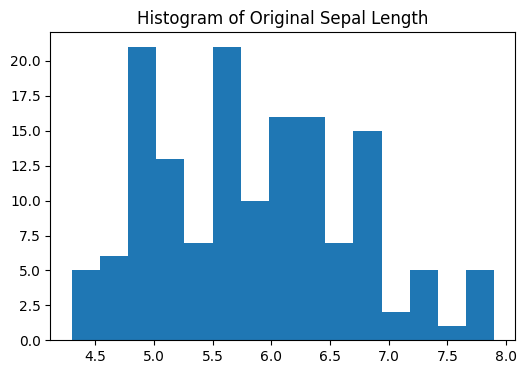


Comparison:
The distribution of sample means is more normal and narrower than the original distribution, illustrating the Central Limit Theorem.


In [ ]:
# =======================================
# 5. Sampling & Central Limit Theorem
# =======================================
sepal = df["sepal length (cm)"]

sample_means = []
for _ in range(100):
    sample = sepal.sample(n=20, replace=True)
    sample_means.append(sample.mean())

# Histogram of sample means
plt.figure(figsize=(6,4))
plt.hist(sample_means, bins=15)
plt.title("Histogram of Sample Means (n=20)")
plt.savefig("plots/histogram_sample_means.png")
plt.show()

# Histogram of original sepal length
plt.figure(figsize=(6,4))
plt.hist(sepal, bins=15)
plt.title("Histogram of Original Sepal Length")
plt.savefig("plots/histogram_original_sepal.png")
plt.show()

print("\nComparison:")
print("The distribution of sample means is more normal and narrower than the original distribution, illustrating the Central Limit Theorem.")



6. Pearson Correlation:
r = 0.8717537758865831
Relationship: positive


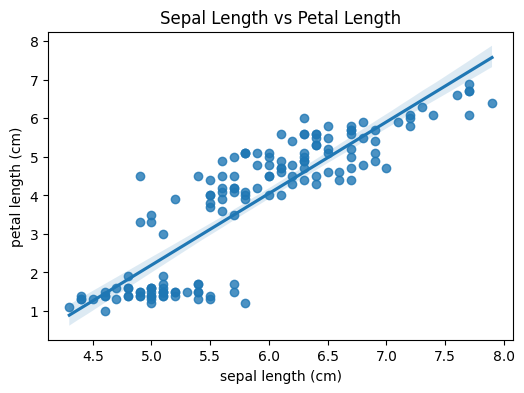

In [ ]:
# =================
# 6. Correlation
# =================
r, p = stats.pearsonr(df["sepal length (cm)"], df["petal length (cm)"])

print("\n6. Pearson Correlation:")
print("r =", r)

if r > 0:
    relation = "positive"
elif r < 0:
    relation = "negative"
else:
    relation = "none"

print("Relationship:", relation)

# Scatter plot
plt.figure(figsize=(6,4))
sns.regplot(x="sepal length (cm)", y="petal length (cm)", data=df)
plt.title("Sepal Length vs Petal Length")
plt.savefig("plots/scatter_sepal_vs_petal.png")
plt.show()


In [ ]:
# ==============================
# 7. t-Test (Setosa vs Versicolor)
# ==============================
setosa = df[df["species"]=="setosa"]["petal length (cm)"]
versicolor = df[df["species"]=="versicolor"]["petal length (cm)"]

t_stat, p_val = stats.ttest_ind(setosa, versicolor)

print("\n7. t-Test Results:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0. The mean petal length is significantly different.")
else:
    print("Conclusion: Fail to reject H0. No significant difference in means.")



7. t-Test Results:
t-statistic = -39.492719391538095
p-value = 5.404910513441677e-62
Conclusion: Reject H0. The mean petal length is significantly different.


In [ ]:
# ============================
# 8. ANOVA (3 Groups)
# ============================
setosa_pw = df[df["species"]=="setosa"]["petal width (cm)"]
versicolor_pw = df[df["species"]=="versicolor"]["petal width (cm)"]
virginica_pw = df[df["species"]=="virginica"]["petal width (cm)"]

F, p = stats.f_oneway(setosa_pw, versicolor_pw, virginica_pw)

print("\n8. ANOVA Results:")
print("F-statistic =", F)
print("p-value =", p)

if p < 0.05:
    print("Conclusion: Reject H0. Petal width differs significantly among species.")
else:
    print("Conclusion: Fail to reject H0. No significant difference among species.")



8. ANOVA Results:
F-statistic = 960.0071468018067
p-value = 4.169445839443833e-85
Conclusion: Reject H0. Petal width differs significantly among species.
